### 1. Предварительный анализ данных

In [130]:
# Загружаем все необходимые библиотеки
from scipy import stats as st
from scipy.stats import shapiro , normaltest
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from numpy import percentile
sns.set(color_codes=True)
#from termcolor import colored

In [131]:
#Загружаем таблицы и передаем информации в переменные
data_games = pd.read_csv('/datasets/games.csv')

In [132]:
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [133]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Вывод по предварительному анализу:
Методом info() рассмотрена информация о количестве строк, пропусков и типе данных таблицы.
 - Name. Тип object , есть 2 пропуска. Возможно их можно удалить.
 - Platform. Тип object , пропусков нет. Нужно проверить тип платформ на уникальность и возможно привести к типовым значениям.
 - Year_of_Release. Тип float64, 1,6% пропусков. Возможно их можно удалить, т.к. заменить год можно приблизительно. Тип данных нужно привести к целым числам int64.
 - Genre. Тип object , есть 2 пропуска. Возможно их можно удалить. Также проверить значения на уникальность.
 - NA_sales. Тип float64. Пропусков нет.
 - EU_sales. Тип float64. Пропусков нет.
 - JP_sale. Тип float64. Пропусков нет.
 - Other_sales. Тип float64. Пропусков нет.
 - Critic_Score. Тип float64. Много пропусков. Возможно заменить тип данных на int64. Пропуски необходимо обработать и заменить значениями, возможно по доходу от игры.
 - User_Score. Тип object. Много пропусков. Возможно заменить тип данных на int64 после обработки пропусков. Возможно заменить пропуски по доходу от игры.
 - Rating. Тип object. Много пропусков. Пропуски необходимо проверить и возможно заменить по названию игр.

По краткому поиску в сети было обнаружено, что одним из источников данных является сайт metacritic.com.

Краткая информация по рейтингу ESRB.

ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association. Основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

### 2. Подготовка данных

#### Замена названий столбцов

In [134]:
# Преобразование названий столбцов
data_games.columns = [columns.lower() for columns in data_games.columns]
data_games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Расчет суммарных продаж во всех регионах

In [135]:
# Складываем столбцы
data_games['sum_sales'] = (data_games['na_sales'] 
                         + data_games['eu_sales'] 
                         + data_games['jp_sales'] 
                         + data_games['other_sales'])
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


#### Обработка пропусков

#####  'name'

In [136]:
# Проверим столбцы на уникальность
data_games['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [137]:
# Посмотрим на строки с пропусками в name
data_games[data_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [138]:
# Удаляем строки с пропусками в name
data_games.dropna(subset=['name'] , inplace = True)
data_games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


- Пропуски в столбце name удалены

#####  'platform'

In [139]:
# Посмотрим на уникальные значения platform
data_games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

#####  'year_of_release'

In [140]:
# Посмотрим на уникальные значения year_of_release
data_games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [141]:
# Определяем количество пропусков в столбце
data_games['year_of_release'].isna().sum()

269

In [142]:
# Посмотрим на строки с пропусками в year_of_release
data_games[data_games['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,2.33
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T,2.24
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09


In [143]:
# Удаляем строки с пропусками в year_of_release
data_games.dropna(subset=['year_of_release'] , inplace = True)
print('Пропуски удалены')
data_games['year_of_release'].isna().sum()

Пропуски удалены


0

#####  'critic_score'  ,   'user_score'  ,  'rating'

In [144]:
# Количество пропусков 
data_games['critic_score'].isna().sum()

8461

In [145]:
# Посмотрим на уникальные значения platform
data_games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [146]:
# Посмотрим на уникальные значения user_score
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [147]:
# Посмотрим на уникальные значения rating
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [148]:
# Значения К-А заменим на Е
data_games.loc[data_games['rating']=='K-A' , 'rating'] = 'E'
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [149]:
# Проверим значения tbd
data_games[data_games['user_score'] =='tbd'].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E,2.24


In [150]:
# Заменим значения tbd на NaN
data_games.loc[data_games['user_score']=='tbd' , 'user_score'] = np.NaN

# Проверим на уникальные значения user_score после замены
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [151]:
# Для игр с нулевыми продажами удалим строки
data_games = data_games.drop(data_games.query("na_sales ==0 & eu_sales ==0 & jp_sales ==0 & other_sales ==0").index)


In [177]:
# Определим сколько пропусков user_score и critic_score совпадают
data_games[data_games['user_score'].isna() & data_games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [153]:
# Определим сколько пропусков в user_score, когда в  critic_score нет пропусков
data_games[data_games['user_score'].isna() & ~data_games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
182,Tomb Raider II,PS,1997.0,Action,2.30,2.46,0.2,0.28,85.0,NaN,T,5.24
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,NaN,E10+,3.97
440,Need for Speed III: Hot Pursuit,PS,1998.0,Racing,2.14,0.86,0.0,0.13,88.0,NaN,E,3.13
637,Riven: The Sequel to Myst,PC,1997.0,Adventure,1.52,0.82,0.0,0.10,83.0,NaN,E,2.44
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,NaN,E,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...
16577,Space Raiders,GC,2003.0,Shooter,0.01,0.00,0.0,0.00,40.0,NaN,T,0.01
16669,Super Robot Taisen: Original Generation,GBA,2002.0,Role-Playing,0.01,0.00,0.0,0.00,72.0,NaN,T,0.01
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,NaN,E,0.01
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,NaN,E,0.01


In [154]:
# Определим сколько пропусков user_score и critic_score совпадают и при этом продажи минимальные
data_games[data_games['user_score'].isna() & data_games['critic_score'].isna() & (data_games['sum_sales']<=0.01)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15564,Super Fruit Fall,Wii,2006.0,Puzzle,0.01,0.00,0.00,0.0,NaN,NaN,E,0.01
15597,Ratchet & Clank Collection,PSV,2014.0,Action,0.00,0.01,0.00,0.0,NaN,NaN,NaN,0.01
15608,The Cheetah Girls,GBA,2006.0,Misc,0.01,0.00,0.00,0.0,NaN,NaN,E,0.01
15615,Disney Infinity,PSV,2013.0,Action,0.01,0.00,0.00,0.0,NaN,NaN,NaN,0.01
15617,Teenage Mutant Ninja Turtles Double Pack,GBA,2006.0,Action,0.01,0.00,0.00,0.0,NaN,NaN,NaN,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN,0.01


In [184]:
# Удаляем строки с пропусками user_score и critic_score и с минимальными продажами
data_games.drop(data_games[data_games['user_score'].isna() &
                           data_games['critic_score'].isna() & 
                           (data_games['sum_sales'] <= 0.01)].index , inplace=True)
data_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [188]:
# Проверим корреляцию между средними значениям и медианами продаж и оценок критиков
data_platform_corr = data_games.pivot_table(index = 'year_of_release' , 
                       values = ['na_sales', 'eu_sales' , 'jp_sales' , 'other_sales' , 'critic_score' , 'user_score' ] ,
                       aggfunc = ['median' , 'mean'] )
data_platform_corr.corr()

median                                            \
                    critic_score  eu_sales  jp_sales  na_sales other_sales   
median critic_score     1.000000 -0.225942 -0.325179 -0.463470   -0.002908   
       eu_sales        -0.225942  1.000000  0.481793  0.645871    0.826995   
       jp_sales        -0.325179  0.481793  1.000000  0.487638    0.288364   
       na_sales        -0.463470  0.645871  0.487638  1.000000    0.460493   
       other_sales     -0.002908  0.826995  0.288364  0.460493    1.000000   
       user_score       0.606545 -0.557007 -0.796387 -0.746420    0.026924   
mean   critic_score     0.987462 -0.218838 -0.247723 -0.429431   -0.085940   
       eu_sales        -0.144863  0.811621  0.484020  0.378574    0.650008   
       jp_sales        -0.220612  0.560798  0.922938  0.519615    0.297990   
       na_sales        -0.383059  0.736076  0.721218  0.714115    0.513337   
       other_sales     -0.519161  0.514939  0.424191  0.128668    0.661819   
       user_score       0.642007 -0.557811 -0.743866 -0.727133   -0.025764   

                                       mean                                \
                    user_score critic_score  eu_sales  jp_sales  na_sales   
median critic_score   0.606545     0.987462 -0.144863 -0.220612 -0.383059   
       eu_sales      -0.557007    -0.218838  0.811621  0.560798  0.736076   
       jp_sales      -0.796387    -0.247723  0.484020  0.922938  0.721218   
       na_sales      -0.746420    -0.429431  0.378574  0.519615  0.714115   
       other_sales    0.026924    -0.085940  0.650008  0.297990  0.513337   
       user_score     1.000000     0.559574 -0.670131 -0.634462 -0.575397   
mean   critic_score   0.559574     1.000000 -0.103743 -0.141372 -0.319857   
       eu_sales      -0.670131    -0.103743  1.000000  0.618419  0.640832   
       jp_sales      -0.634462    -0.141372  0.618419  1.000000  0.790396   
       na_sales      -0.575397    -0.319857  0.640832  0.790396  1.000000   
       other_sales   -0.470449    -0.537441  0.694433  0.369415  0.351824   
       user_score     0.992403     0.606354 -0.630190 -0.566988 -0.522804   

                                            
                    other_sales user_score  
median critic_score   -0.519161   0.642007  
       eu_sales        0.514939  -0.557811  
       jp_sales        0.424191  -0.743866  
       na_sales        0.128668  -0.727133  
       other_sales     0.661819  -0.025764  
       user_score     -0.470449   0.992403  
mean   critic_score   -0.537441   0.606354  
       eu_sales        0.694433  -0.630190  
       jp_sales        0.369415  -0.566988  
       na_sales        0.351824  -0.522804  
       other_sales     1.000000  -0.512817  
       user_score     -0.512817   1.000000

In [189]:
# Преобразуем данные user_score к численному типу
data_games['user_score'] = data_games['user_score'].astype(float)
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15928 entries, 0 to 16705
Data columns (total 12 columns):
name               15928 non-null object
platform           15928 non-null object
year_of_release    15928 non-null int64
genre              15928 non-null object
na_sales           15928 non-null float64
eu_sales           15928 non-null float64
jp_sales           15928 non-null float64
other_sales        15928 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9690 non-null object
sum_sales          15928 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [190]:
# Преобразуем данные year_of_release целому типу
data_games['year_of_release'] = data_games['year_of_release'].astype(int)
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15928 entries, 0 to 16705
Data columns (total 12 columns):
name               15928 non-null object
platform           15928 non-null object
year_of_release    15928 non-null int64
genre              15928 non-null object
na_sales           15928 non-null float64
eu_sales           15928 non-null float64
jp_sales           15928 non-null float64
other_sales        15928 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9690 non-null object
sum_sales          15928 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


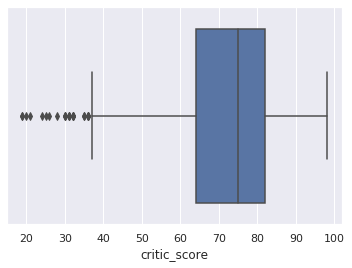

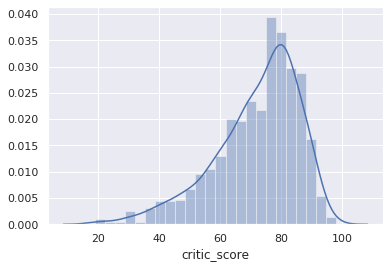

0        76.0
3        80.0
13       80.0
15       80.0
77       82.0
         ... 
16452    78.0
16474    57.0
16528    78.0
16546    78.0
16551    88.0
Name: critic_score, Length: 1165, dtype: float64

In [159]:
sports_genre = data_games.loc[(data_games['genre'] =='Sports') & (~data_games['critic_score'].isna()) , 'critic_score']
sports_genre
sns.boxplot(sports_genre)
plt.show()
sports_genre.mean()
sns.distplot(sports_genre)
plt.show()
sports_genre

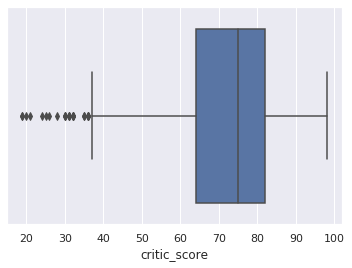

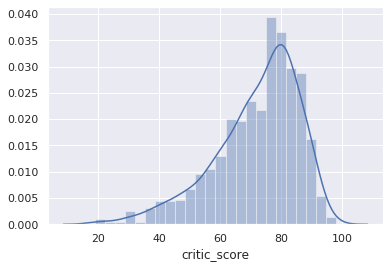

0        76.0
3        80.0
13       80.0
15       80.0
77       82.0
         ... 
16452    78.0
16474    57.0
16528    78.0
16546    78.0
16551    88.0
Name: critic_score, Length: 1165, dtype: float64

In [160]:
action_genre = data_games.loc[(data_games['genre'] =='Action') & (~data_games['critic_score'].isna()) , 'critic_score']
sports_genre
sns.boxplot(sports_genre)
plt.show()
sports_genre.mean()
sns.distplot(sports_genre)
plt.show()
sports_genre

In [161]:
data_games[data_games['genre'] == 'Sports'].corr()


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,0.013353,0.054812,-0.228692,0.080761,-0.101135,-0.514169,0.011920
na_sales,0.013353,1.000000,0.855772,0.462237,0.822291,0.140954,0.056217,0.961390
eu_sales,0.054812,0.855772,1.000000,0.500716,0.871263,0.101488,0.016910,0.953448
jp_sales,-0.228692,0.462237,0.500716,1.000000,0.460706,0.072932,0.084220,0.577431
other_sales,0.080761,0.822291,0.871263,0.460706,1.000000,0.132162,0.031394,0.899324
critic_score,-0.101135,0.140954,0.101488,0.072932,0.132162,1.000000,0.517810,0.127650
user_score,-0.514169,0.056217,0.016910,0.084220,0.031394,0.517810,1.000000,0.044148
sum_sales,0.011920,0.961390,0.953448,0.577431,0.899324,0.127650,0.044148,1.000000


#### Вывод по результатам подготовки данных:
Для удобства работы с таблицей имена столбцов приведены к нижнему регистру методом списка .lower().
Обработка пропусков 
 - name. В столбце определены пропуски методом isna(). Обнаружены 2 строки, которые удалены, т.к. их отсутствие не повлияет н результаты исследования.
 - platform.   В столбце пропуски не обнаружены, поэтому оставлен без изменений.
 - year_of_release. В столбце обнаружены 269 пропусков. Строки с пропусками в столбце удалены, т.к. их количество незначительно относительно всей длины таблицы и соответственно не значительно повлияет на результат анализа, т.е. всего 269/16713 = 1,6%.
 - critic_score. В столбце обнаружено 8459 пропусков. Которые
 

#### Преобразование данных к нужным типам

In [162]:
#data_games[['year_of_release' , 'critic_score']] = data_games[['year_of_release' , 'critic_score']].astype(int)

#### Вывод по результатам подготовки данных:

### 3. Исследовательский анализ данных

#### Сколько игр выпускалось за разные годы?

In [163]:
data_games_game_pivot = data_games.pivot_table(index = 'year_of_release' , values = 'name' ,  aggfunc = 'count')
data_games_game_pivot

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


#### Исследование платформ. 
Платформы с наибольшими суммарными продажами и их распределение по годам. 
    За какой характерный срок появляются новые и исчезают старые платформы?

In [164]:
# Создаем таблицу с суммой продаж по каждой платформе. Сортируем по убыванию. Рассматриваем 10 платформ
data_games_platform_pivot = (data_games.pivot_table(index = ['platform' ] 
                                                   , values = 'sum_sales' 
                                     
                                                   ,  aggfunc = 'sum').
                                         reset_index().
                                        sort_values(by= 'sum_sales' , ascending = False).head(10)
                             )
data_games_platform_pivot

,platform,sum_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


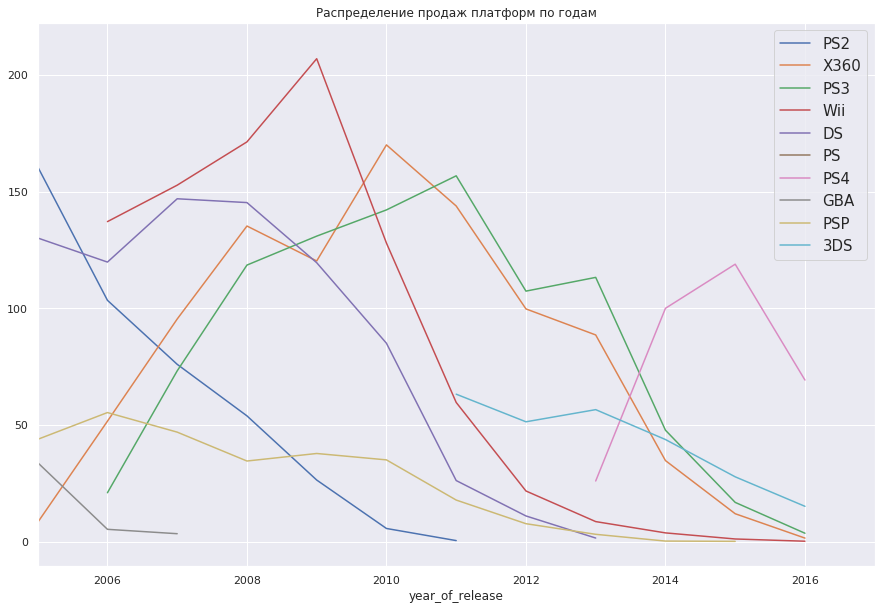

In [165]:
# График распределения продаж по годам для разных платформ
ax = plt.gca()
for index in data_games_platform_pivot.platform:
    # Сводная таблица с данными продаж по годам для платформы
    data_step = (data_games.query("platform == @index").pivot_table(index = 'year_of_release' , 
                                             values = 'sum_sales',
                                             aggfunc = 'sum').
                                 reset_index()) 
    # Строим график
    data_step.plot(x = 'year_of_release' , y = 'sum_sales' , ax=ax , figsize = (15,10))

# Рисуем легенду, название, задаем лимиты значений
ax.legend(data_games_platform_pivot.platform, fontsize = 15)
plt.title('Распределение продаж платформ по годам')
plt.xlim([2005, 2017])
plt.show()

In [166]:
# Период существования платформы. 
platform = []    # здесь запишем ключи
years = []   # здесь запишем значения
for value in data_games_platform_pivot.platform:   
    data_games_step = (data_games.loc[data_games['platform']==value].
                                 pivot_table(index = 'year_of_release' ,
                                             values = 'sum_sales',
                                             aggfunc = 'sum').
                                 reset_index()
                      )  
    # Записываем в список разность лет
    years.append(max(data_games_step['year_of_release']) - min(data_games_step['year_of_release']))
    # Записываем в список названия платформ
    platform.append(value)
#Создаем датафрейм 
platform_life = pd.DataFrame({'platform':platform , 'years': years })
#  Выводим среднее значение жизни платформы
platform_life.mean()

years    10.5
dtype: float64

Краткий вывод по этапу:

По полученному среднему значению жизни платформы принимаем актуальный период равным 10 годам.

#### Выбор актуальных данных

In [167]:
# Выбираем из исходной таблицы все игры выпущенные с 2006года
data_games_actual = data_games.query('year_of_release >=2006')
data_games_actual.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05


#### Какие платформы лидируют по продажам, растут или падают? Выбор нескольких потенциально прибыльных платформ.

In [168]:
# Выбираем платформы с максимальными продажами за выбранный период
data_games_actual_pivot = (data_games_actual.pivot_table(index = ['platform' ] ,
                                                    values = 'sum_sales' ,                                    
                                                     aggfunc = 'sum').
                                         reset_index().
                                        sort_values(by= 'sum_sales' , ascending = False))
                
data_games_actual_pivot

,platform,sum_sales
13,X360,952.99
7,PS3,931.34
11,Wii,891.18
2,DS,655.35
8,PS4,314.14
6,PS2,265.80
0,3DS,257.81
9,PSP,238.63
5,PC,163.42
15,XOne,159.32


Краткий вывод по этапу:

Для дальнейшего анализа принимаем 9 платформ с максимальными продажами.

In [169]:
data_games_actual['platform']

0         Wii
2         Wii
3         Wii
6          DS
7         Wii
         ... 
16707     PSV
16710     PS3
16711    X360
16712     PSV
16714     PSV
Name: platform, Length: 10331, dtype: object

#### Построение графика «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Какая разница в продажах? А в средних продажах на разных платформах? Описание результата.

In [170]:
# Создаеем таблицу для построения графиков только с выбранными платформами
data_games_actual_box = data_games_actual[data_games_actual['platform'].
                                          isin(data_games_actual_pivot.head(9)['platform'])]

data_games_actual_box

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


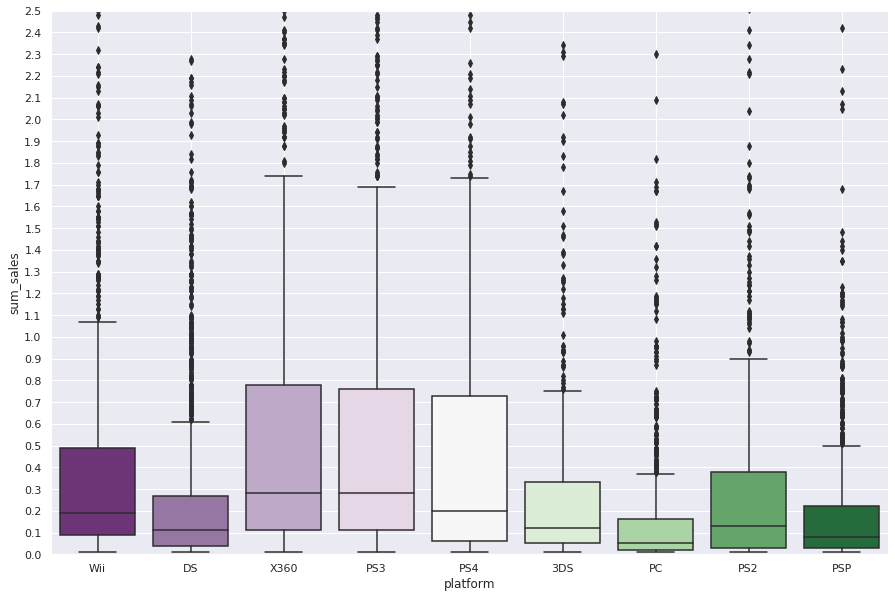

In [171]:
# строим график с усами по выбранным платформам

fig , ax = plt.subplots(figsize=(15,10))

sns.boxplot(x="platform", y="sum_sales", data=data_games_actual_box, palette="PRGn" )
ax.set_ylim([0,2.5])
ax.grid(b = True)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

Краткий вывод по результатам анализа графиков с усами:

Медиана значений продаж по всем платформам находится в пределах 0,05-0.3 млн. ,но большая часть платформ находится в пределах  0,15-0,3млн.

#### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. Диаграмма рассеяния и корреляция между отзывами и продажами

In [172]:
# Выбираем игры на самой популярной платформе X360
data_games_actual_x360 = data_games.query("platform == 'X360'")
data_games_actual_x360.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
36,Call of Duty: Modern Warfare 2,X360,2009,Shooter,8.52,3.59,0.08,1.28,94.0,6.3,M,13.47
44,Halo 3,X360,2007,Shooter,7.97,2.81,0.13,1.21,94.0,7.8,M,12.12
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
64,Halo: Reach,X360,2010,Shooter,7.04,1.95,0.08,0.79,91.0,7.9,M,9.86


In [173]:
# Проверим сколько пропусков в таблице
data_games_actual_x360.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 14 to 16711
Data columns (total 12 columns):
name               1232 non-null object
platform           1232 non-null object
year_of_release    1232 non-null int64
genre              1232 non-null object
na_sales           1232 non-null float64
eu_sales           1232 non-null float64
jp_sales           1232 non-null float64
other_sales        1232 non-null float64
critic_score       894 non-null float64
user_score         945 non-null float64
rating             1030 non-null object
sum_sales          1232 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 125.1+ KB


Text(0, 0.5, 'Суммарные продажи')

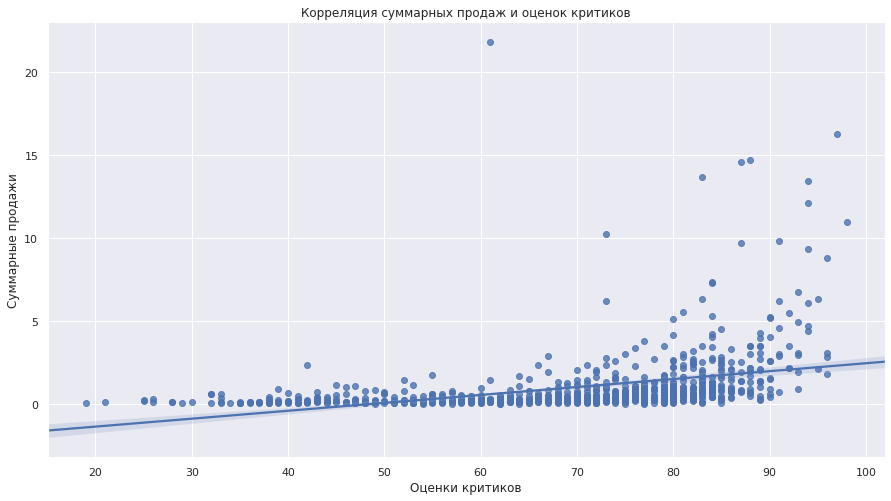

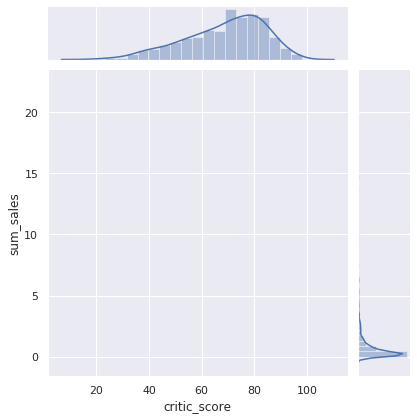

In [174]:
# Создаем новый график
fig, ax = plt.subplots(figsize = (15,8))
# Выводим график, названия,
sns.jointplot(x='critic_score', y='sum_sales', data = data_games_actual_x360, kind='reg' , ax=ax);
ax.set_title('Корреляция суммарных продаж и оценок критиков')
ax.set_xlabel('Оценки критиков')
ax.set_ylabel('Суммарные продажи')


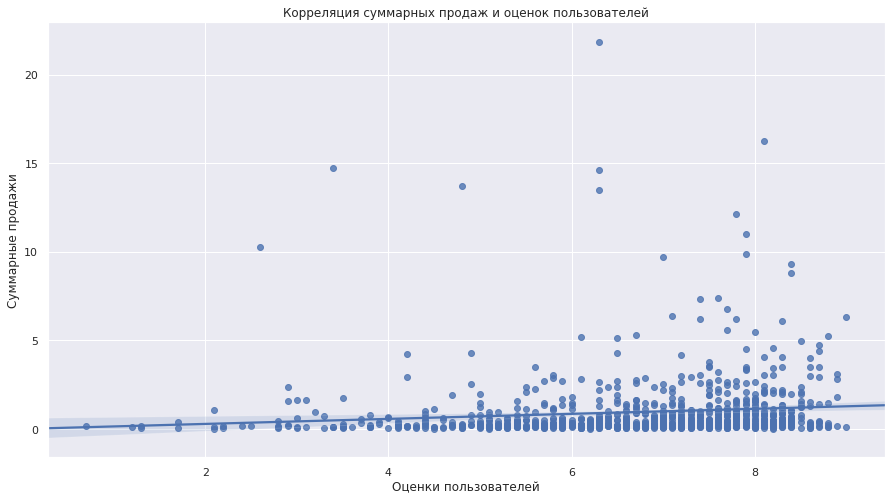

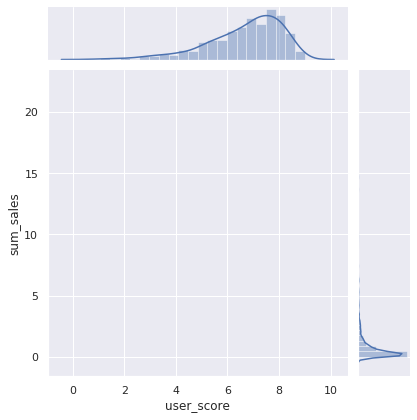

In [175]:
# Создаем новый график
fig, ax = plt.subplots(figsize = (15,8))
# Выводим график, названия,
sns.jointplot(x='user_score', y='sum_sales', data = data_games_actual_x360, kind='reg' , ax=ax );
ax.set_title('Корреляция суммарных продаж и оценок пользователей')
ax.set_xlabel('Оценки пользователей')
ax.set_ylabel('Суммарные продажи')
plt.show()


In [176]:
data_games_actual_x360[['sum_sales' , 'critic_score' , 'user_score' ]].corr()

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.392866,0.114187
critic_score,0.392866,1.000000,0.625020
user_score,0.114187,0.625020,1.000000


#### Соотношение выводов с продажами игр на других платформах.

#### Анализ игр по жанрам. 

Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### 4. Портрет пользователя каждого региона

#### Самые популярные платформы (топ-5). Описание различия в долях продаж

#### Самые популярные жанры (топ-5). Поясните разницу.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### 5. Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

#### Средние пользовательские рейтинги жанров Action и Sports разные

### 6. Общий вывод